In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats



In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
#SalePrice 분석
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

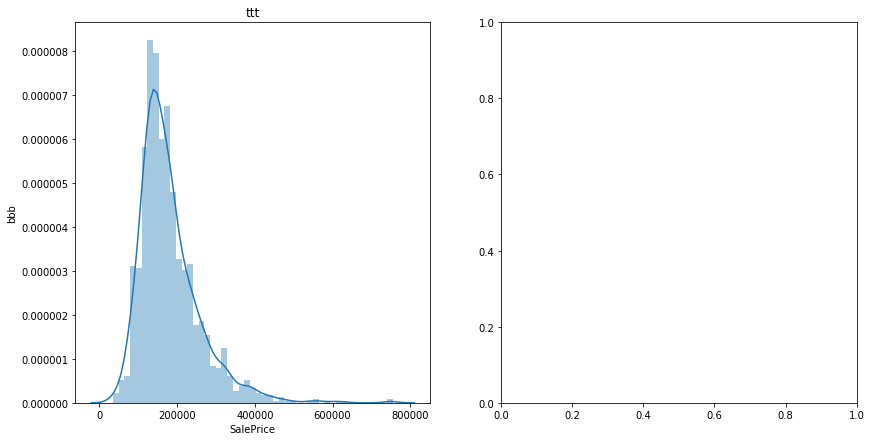

In [4]:
#SalePrice분석
f,ax=plt.subplots(1,2,figsize=(14,7))
ax[0].set_title("ttt")
ax[0].set_xlabel("aaa")
ax[0].set_ylabel("bbb")
sns.distplot(train["SalePrice"],ax=ax[0])

In [5]:
#SalePrice Analysis
print("Skewness: %f" % train["SalePrice"].skew())
print("Kurtosis: %f" % train["SalePrice"].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


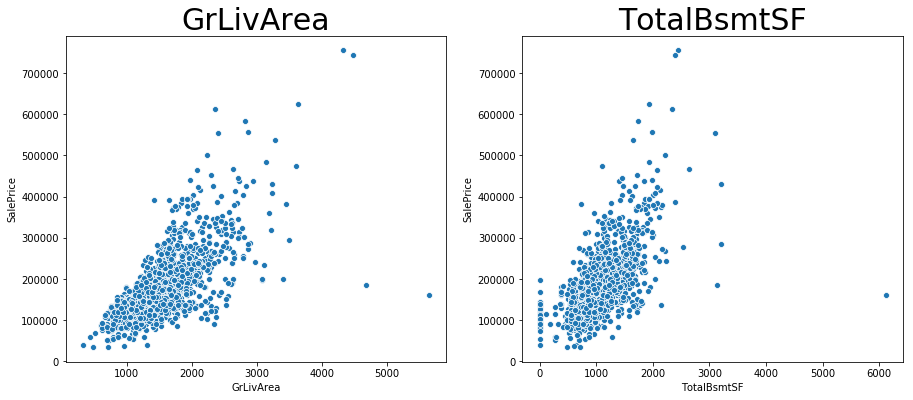

In [6]:
#Relationship with numerical variables
f,ax=plt.subplots(1,2,figsize=(15,6))
src="GrLivArea"
tar="SalePrice"
ax[0].set_title(src,fontsize=30)
sns.scatterplot(x=train[src],y=train[tar],ax=ax[0])
src="TotalBsmtSF"
ax[1].set_title(src,fontsize=30)
sns.scatterplot(x=train[src],y=train[tar],ax=ax[1])


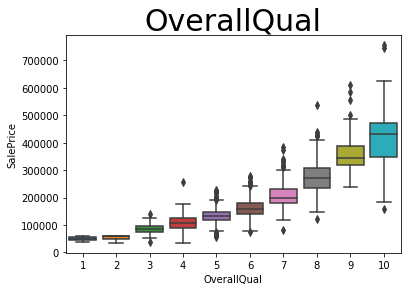

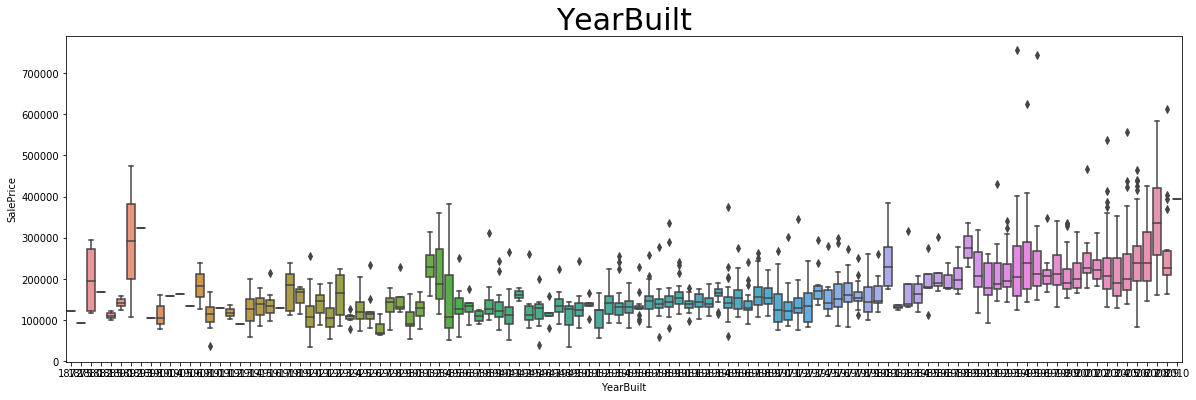

In [7]:
f,ax=plt.subplots()
src="OverallQual"
tar="SalePrice"
ax.set_title(src,fontsize=30)
sns.boxplot(x=train[src],y=train[tar],ax=ax)
f,ax=plt.subplots(figsize=(20,6))
src="YearBuilt"
tar="SalePrice"
ax.set_title(src,fontsize=30)
sns.boxplot(x=train[src],y=train[tar],ax=ax)

In [ ]:
## Correlation matrix
cmap=plt.cm.BuGn
corrmat=train.corr()
f,ax=plt.subplots(figsize=(12,8))
sns.heatmap(corrmat,cmap=cmap)


In [ ]:
# k=10
# colormap=plt.cm.BuGn
# cols=corrmat.nlargest(k,"SalePrice")["SalePrice"].index
# cm=np.corrcoef(train[cols].T.values)
# sns.set(font_scale=1.25)
# hm=sns.heatmap(cm,annot=True,annot_kws={"size":10},cmap=colormap,yticklabels=cols.values,xticklabels=cols.values)

k=10
cmap=plt.cm.BuGn
cols=corrmat.nlargest(k,"SalePrice")["SalePrice"].index
cm=np.corrcoef(train[cols].T.values)
sns.set(font_scale=1.25)
sns.heatmap(cm,cmap=cmap,annot=True,annot_kws={"size":10},yticklabels=cols,xticklabels=cols)

In [ ]:
sns.set()
cols2=["SalePrice","OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt"]
sns.pairplot(train[cols2],size=2.5)
plt.show()


In [ ]:
tt=train.isnull().sum().sort_values(ascending=False)
print(tt)

In [ ]:
total=train.isnull().sum().sort_values(ascending=False)
percent=train.isnull().mean().sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
print(missing_data.head(20))
print(missing_data.shape)
print(type(missing_data))

In [ ]:
train=train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train=train.drop(train.loc[train["Electrical"].isnull()].index)


In [ ]:
#standarizing data
saleprice_scaled=StandardScaler().fit_transform(train["SalePrice"][:,np.newaxis])
#print(type(saleprice_scaled),saleprice_scaled.shape,train.shape)
low_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print("outer range (low) of the distribution:")
print(low_range,low_range.shape)
print("\nouter range (high) of the distribution:")
print(high_range,high_range.shape)

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(saleprice_scaled,ax=ax[0])
ax[0].set_title(tar,fontsize=30)

src="GrLivArea"
tar="SalePrice"
sns.scatterplot(train[src],train[tar],ax=ax[1])
ax[1].set_title(src,fontsize=30)


In [ ]:
src="GrLivArea"
tar="SalePrice"
print(train.shape)
train.sort_values(by=src, ascending=False)[:2]
train=train.drop(train[train["Id"]==1299].index)
train=train.drop(train[train["Id"]==524].index)
print(train.shape)

In [ ]:
src="TotalBsmtSF"
tar="SalePrice"
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(train[src],train[tar],ax=ax[0])
train[[src,tar]].plot.scatter(x=src,y=tar,ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
tar="SalePrice"
sns.distplot(train[tar],ax=ax[0],fit=norm)
stats.probplot(train[tar],plot=ax[1])

In [ ]:
tar="SalePrice"
train[tar]=np.log(train[tar])

In [ ]:
np.log(0.00001)

In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
tar="SalePrice"
sns.distplot(train[tar],ax=ax[0],fit=norm)
stats.probplot(train[tar],plot=ax[1])


In [ ]:
src="GrLivArea"
tar="SalePrice"
f,ax=plt.subplots(1,2,figsize=(14,6))
sns.distplot(train[src],fit=norm,ax=ax[0])
stats.probplot(train[src],plot=ax[1])

In [ ]:
src="GrLivArea"
train[src]=np.log(train[src])

In [ ]:
src="GrLivArea"
tar="SalePrice"
f,ax=plt.subplots(1,2,figsize=(14,6))
sns.distplot(train[src],fit=norm,ax=ax[0])
stats.probplot(train[src],plot=ax[1])

In [ ]:
src="TotalBsmtSF"
tar="SalePrice"
f,ax=plt.subplots(1,2,figsize=(14,6))
sns.distplot(train[src],fit=norm,ax=ax[0])
stats.probplot(train[src],plot=ax[1])

In [ ]:
newsrc="HasBsmt"
src="TotalBsmtSF"
train[newsrc]=pd.Series(len(train[src]),index=train.index)
train[newsrc]=0
train.loc[train[src]>0,newsrc]=1

In [ ]:
train.loc[train[newsrc]==1,src]=np.log(train[src])

In [ ]:
src="TotalBsmtSF"
tar="SalePrice"
f,ax=plt.subplots(1,2,figsize=(14,6))
sns.distplot(train[train[src]>0][src],fit=norm,ax=ax[0])
stats.probplot(train[train[src]>0][src],plot=ax[1])

In [ ]:
groups=train.groupby("MSZoning")

In [ ]:
groups.groups